In [24]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

In [2]:
df=pd.read_csv("/content/Processed_Data_v2.zip")

In [3]:
df.head(10)

,CRASH DATE,CRASH TIME,LATITUDE,LONGITUDE,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,CLASS TYPE
0,2021-09-11,09:35:00,40.667202,-73.866500,Unspecified,No factor,No factor,No factor,No factor,Sedan,No vehicle,No vehicle,No vehicle,No vehicle,Class 0
1,2021-12-14,08:17:00,40.868160,-73.831480,Unspecified,Unspecified,No factor,No factor,No factor,Sedan,Sedan,No vehicle,No vehicle,No vehicle,Class 1
2,2021-12-14,14:58:00,40.751440,-73.973970,Passing Too Closely,Unspecified,No factor,No factor,No factor,Sedan,Station Wagon/Sport Utility Vehicle,No vehicle,No vehicle,No vehicle,Class 0
3,2021-12-14,16:50:00,40.675884,-73.755770,Turning Improperly,Unspecified,No factor,No factor,No factor,Sedan,Station Wagon/Sport Utility Vehicle,No vehicle,No vehicle,No vehicle,Class 0
4,2021-12-11,19:43:00,40.872620,-73.904686,Unspecified,Unspecified,No factor,No factor,No factor,Station Wagon/Sport Utility Vehicle,Sedan,No vehicle,No vehicle,No vehicle,Class 1
5,2021-12-14,14:30:00,40.783268,-73.824850,Following Too Closely,Unspecified,Unspecified,No factor,No factor,Station Wagon/Sport Utility Vehicle,Sedan,Sedan,No vehicle,No vehicle,Class 0
6,2021-12-14,05:46:00,40.744644,-73.770410,Other Vehicular,Other Vehicular,No factor,No factor,No factor,Station Wagon/Sport Utility Vehicle,Station Wagon/Sport Utility Vehicle,No vehicle,No vehicle,No vehicle,Class 1
7,2021-12-13,06:30:00,40.753730,-73.885050,Unspecified,No factor,No factor,No factor,No factor,Sedan,No vehicle,No vehicle,No vehicle,No vehicle,Class 0
8,2021-12-14,03:43:00,40.804375,-73.937420,Unspecified,No factor,No factor,No factor,No factor,Station Wagon/Sport Utility Vehicle,No vehicle,No vehicle,No vehicle,No vehicle,Class 1
9,2021-12-13,17:40:00,40.631650,-74.087620,Unspecified,Unspecified,No factor,No factor,No factor,Sedan,Sedan,No vehicle,No vehicle,No vehicle,Class 1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057417 entries, 0 to 1057416
Data columns (total 15 columns):
 #   Column                         Non-Null Count    Dtype  
---  ------                         --------------    -----  
 0   CRASH DATE                     1057417 non-null  object 
 1   CRASH TIME                     1057417 non-null  object 
 2   LATITUDE                       1057417 non-null  float64
 3   LONGITUDE                      1057417 non-null  float64
 4   CONTRIBUTING FACTOR VEHICLE 1  1057417 non-null  object 
 5   CONTRIBUTING FACTOR VEHICLE 2  1057417 non-null  object 
 6   CONTRIBUTING FACTOR VEHICLE 3  1057417 non-null  object 
 7   CONTRIBUTING FACTOR VEHICLE 4  1057417 non-null  object 
 8   CONTRIBUTING FACTOR VEHICLE 5  1057417 non-null  object 
 9   VEHICLE TYPE CODE 1            1057417 non-null  object 
 10  VEHICLE TYPE CODE 2            1057417 non-null  object 
 11  VEHICLE TYPE CODE 3            1057417 non-null  object 
 12  VEHICLE TYPE C

In [5]:
df.isna().sum()

CRASH DATE                       0
CRASH TIME                       0
LATITUDE                         0
LONGITUDE                        0
CONTRIBUTING FACTOR VEHICLE 1    0
CONTRIBUTING FACTOR VEHICLE 2    0
CONTRIBUTING FACTOR VEHICLE 3    0
CONTRIBUTING FACTOR VEHICLE 4    0
CONTRIBUTING FACTOR VEHICLE 5    0
VEHICLE TYPE CODE 1              0
VEHICLE TYPE CODE 2              0
VEHICLE TYPE CODE 3              0
VEHICLE TYPE CODE 4              0
VEHICLE TYPE CODE 5              0
CLASS TYPE                       0
dtype: int64

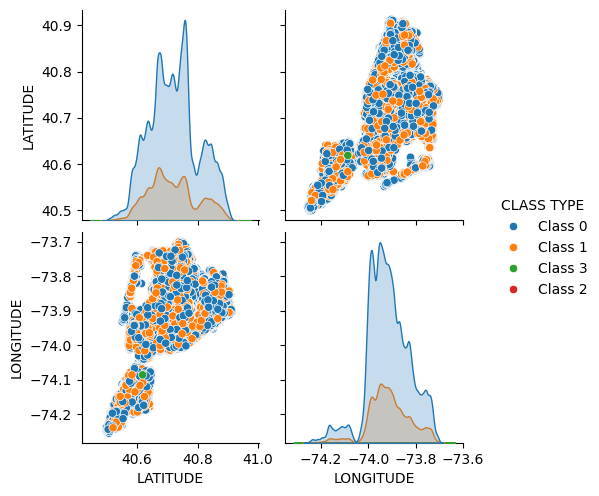

In [18]:
sns.pairplot(df,hue="CLASS TYPE")

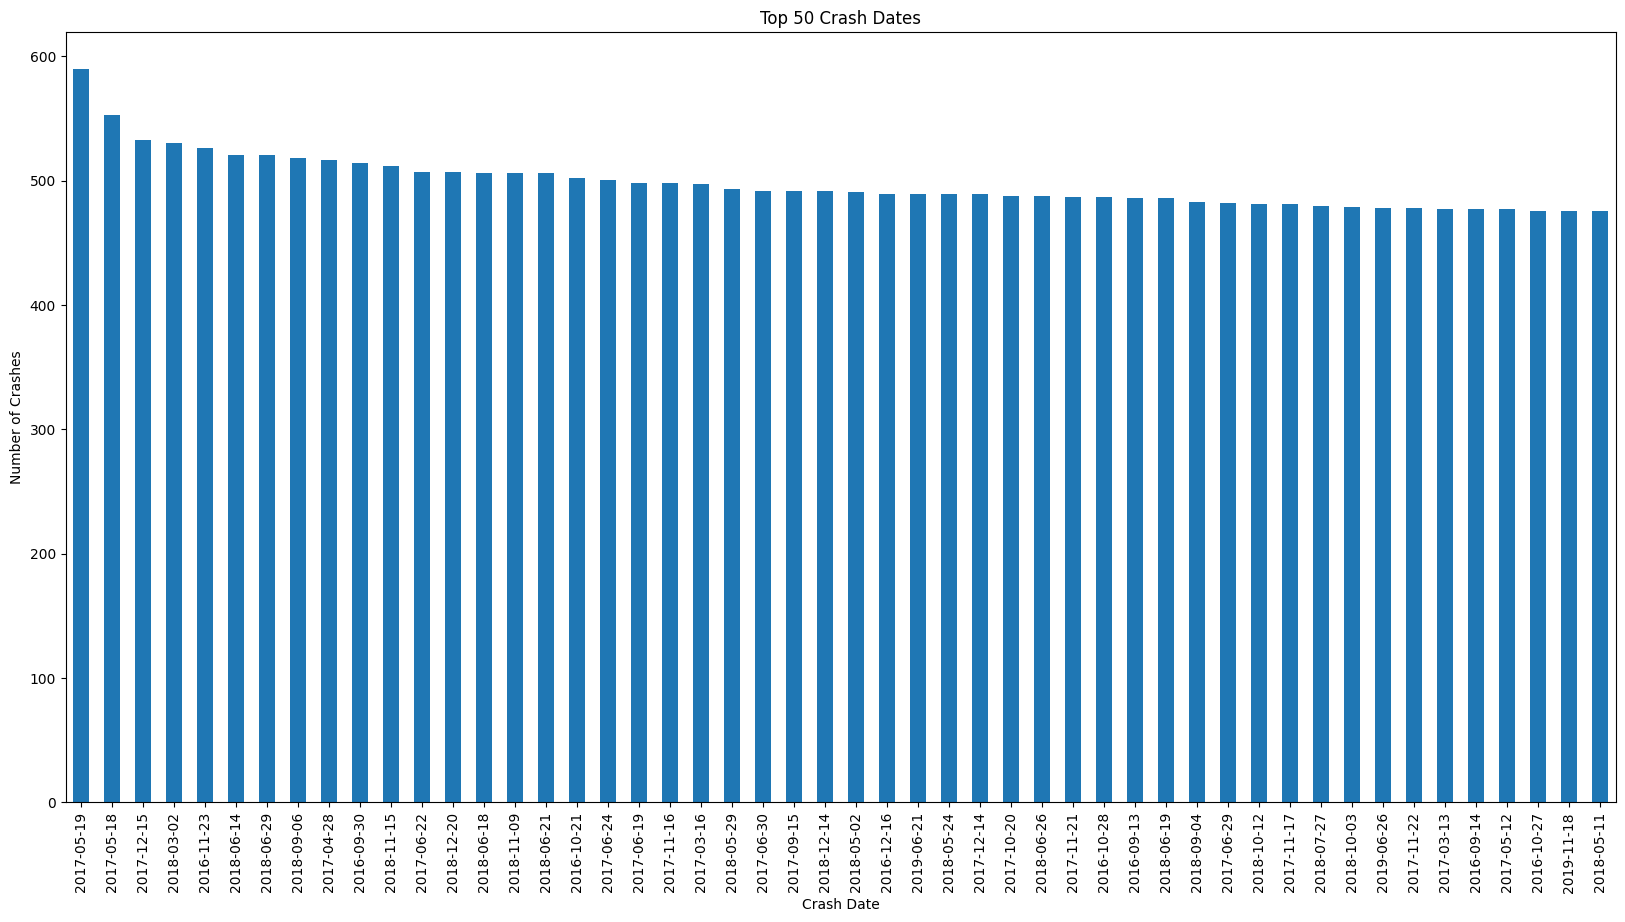

In [6]:
value_counts = df['CRASH DATE'].value_counts()
top_50 = value_counts.head(50)
top_50.plot(kind='bar', figsize=(20, 10))
plt.title('Top 50 Crash Dates')
plt.xlabel('Crash Date')
plt.ylabel('Number of Crashes')
plt.show()

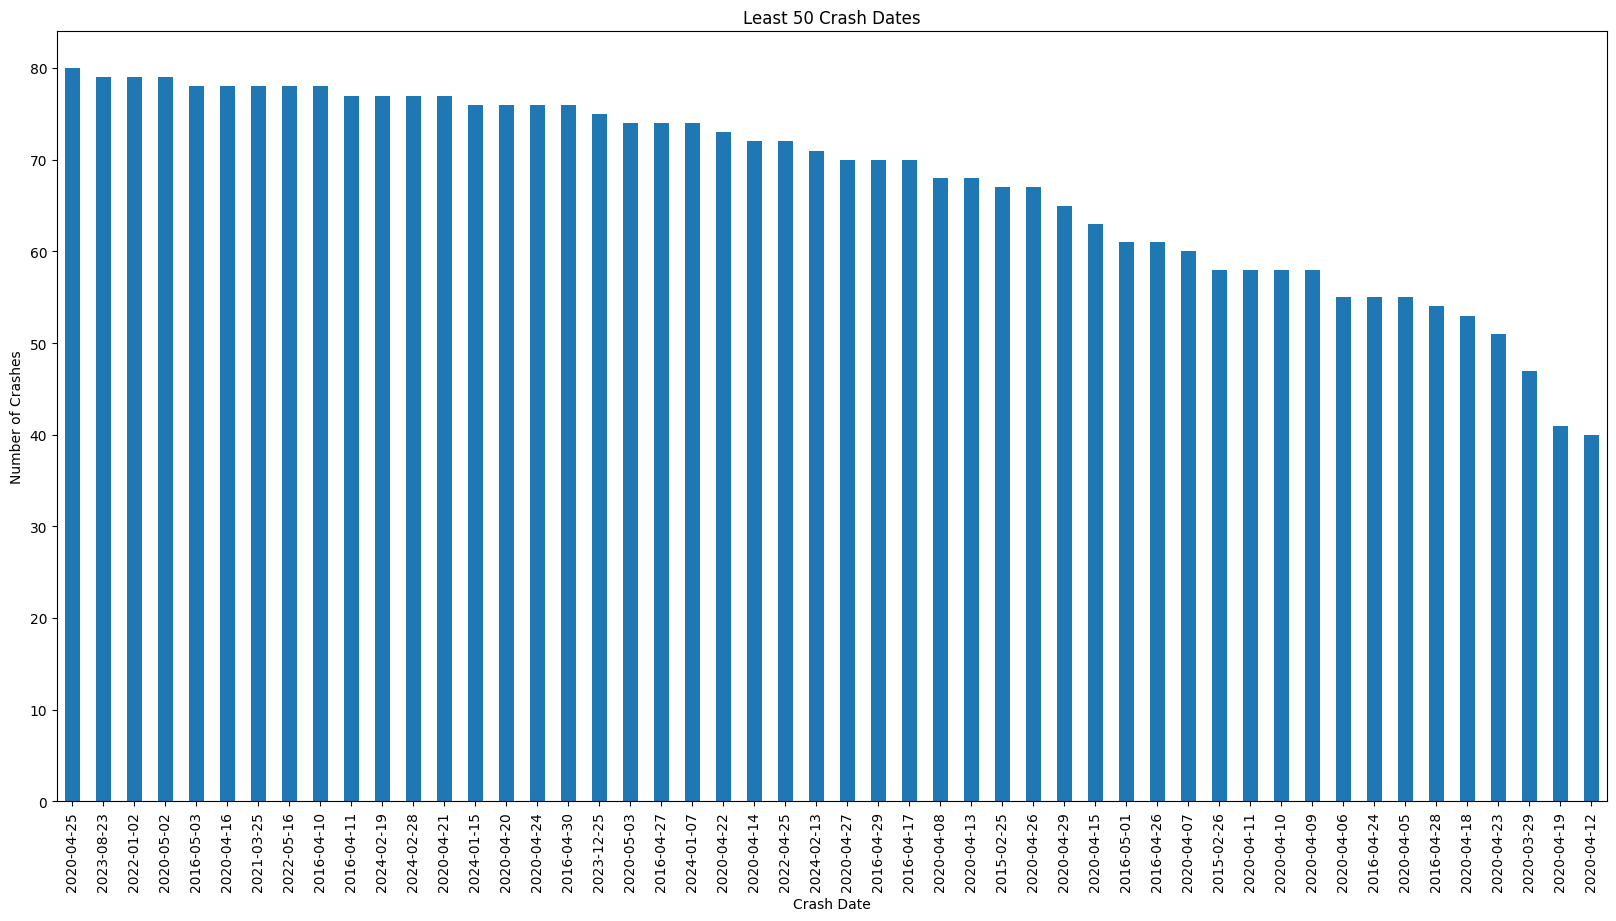

In [7]:
least_50 = value_counts.tail(50)
least_50.plot(kind='bar', figsize=(20, 10))
plt.title('Least 50 Crash Dates')
plt.xlabel('Crash Date')
plt.ylabel('Number of Crashes')
plt.show()

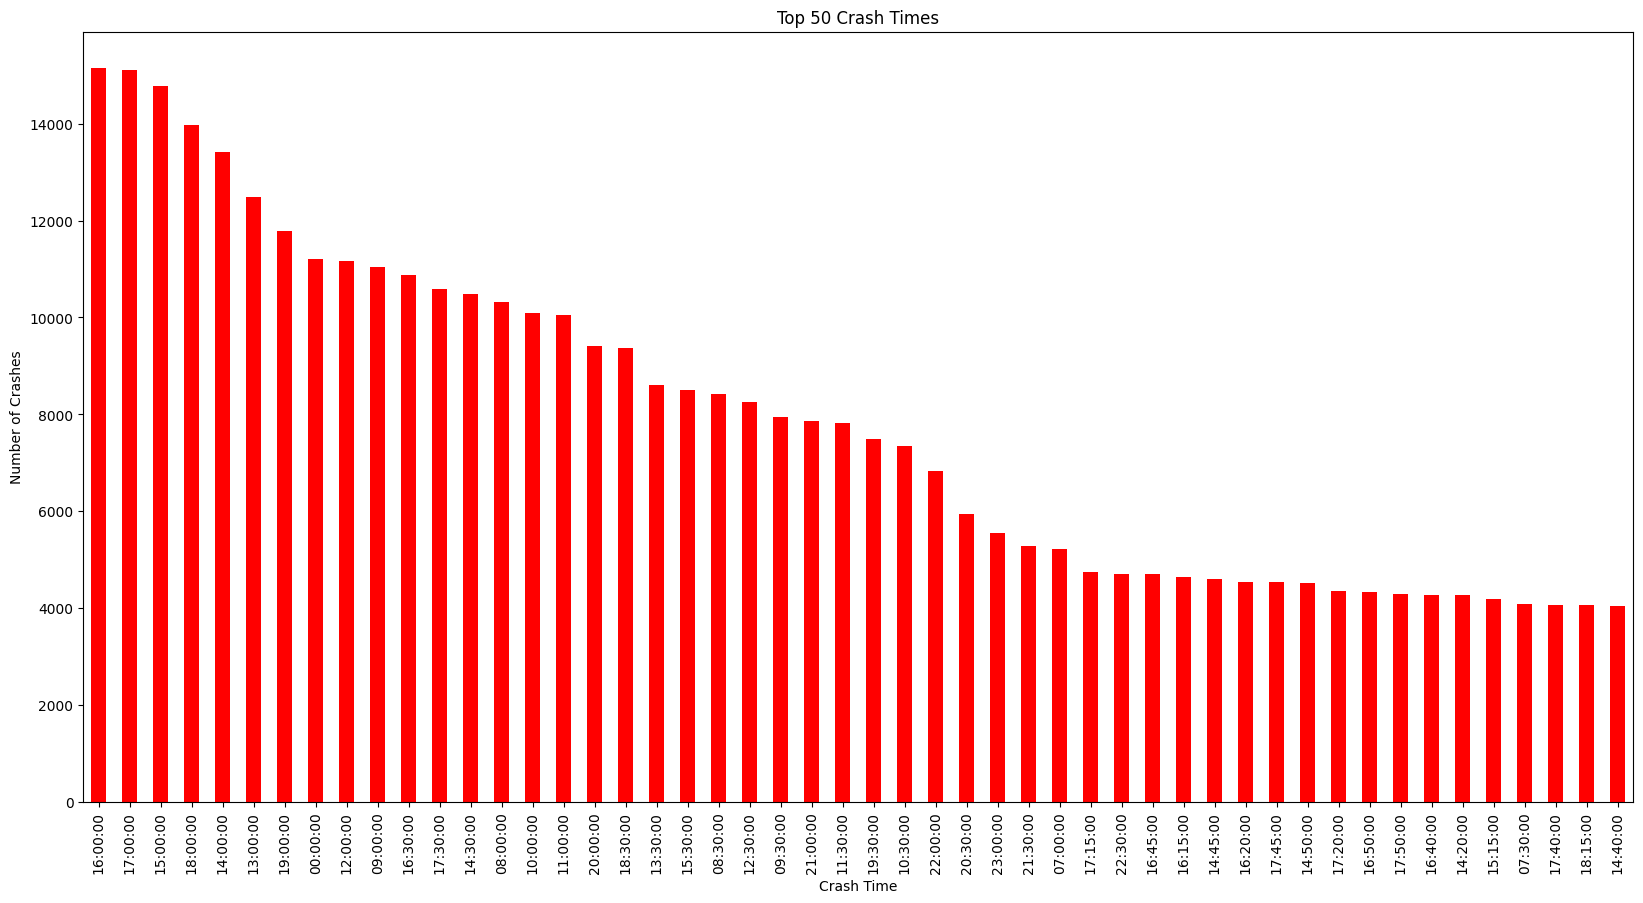

In [8]:
value_counts_time = df['CRASH TIME'].value_counts()
top_50 = value_counts_time.head(50)
top_50.plot(kind='bar', figsize=(20, 10),color='r')
plt.title('Top 50 Crash Times')
plt.xlabel('Crash Time')
plt.ylabel('Number of Crashes')
plt.show()

In [9]:
df['CLASS TYPE'].value_counts()

CLASS TYPE
Class 0    824193
Class 1    231289
Class 2      1030
Class 3       905
Name: count, dtype: int64

In [10]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'LATITUDE', 'LONGITUDE',
       'CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2',
       'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4',
       'CONTRIBUTING FACTOR VEHICLE 5', 'VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5', 'CLASS TYPE'],
      dtype='object')

In [11]:
encoded_df = pd.get_dummies(df, columns=['CONTRIBUTING FACTOR VEHICLE 1','CONTRIBUTING FACTOR VEHICLE 2','CONTRIBUTING FACTOR VEHICLE 3','CONTRIBUTING FACTOR VEHICLE 4','CONTRIBUTING FACTOR VEHICLE 5','VEHICLE TYPE CODE 1',
       'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4',
       'VEHICLE TYPE CODE 5'])

print(encoded_df.head())

   CRASH DATE CRASH TIME   LATITUDE  LONGITUDE CLASS TYPE  \
0  2021-09-11   09:35:00  40.667202 -73.866500    Class 0   
1  2021-12-14   08:17:00  40.868160 -73.831480    Class 1   
2  2021-12-14   14:58:00  40.751440 -73.973970    Class 0   
3  2021-12-14   16:50:00  40.675884 -73.755770    Class 0   
4  2021-12-11   19:43:00  40.872620 -73.904686    Class 1   

   CONTRIBUTING FACTOR VEHICLE 1_Backing Unsafely  \
0                                           False   
1                                           False   
2                                           False   
3                                           False   
4                                           False   

   CONTRIBUTING FACTOR VEHICLE 1_Driver Inattention/Distraction  \
0                                              False              
1                                              False              
2                                              False              
3                                             

In [12]:
encoded_df = encoded_df.replace({True: 1, False: 0})
print(encoded_df.head())

   CRASH DATE CRASH TIME   LATITUDE  LONGITUDE CLASS TYPE  \
0  2021-09-11   09:35:00  40.667202 -73.866500    Class 0   
1  2021-12-14   08:17:00  40.868160 -73.831480    Class 1   
2  2021-12-14   14:58:00  40.751440 -73.973970    Class 0   
3  2021-12-14   16:50:00  40.675884 -73.755770    Class 0   
4  2021-12-11   19:43:00  40.872620 -73.904686    Class 1   

   CONTRIBUTING FACTOR VEHICLE 1_Backing Unsafely  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   CONTRIBUTING FACTOR VEHICLE 1_Driver Inattention/Distraction  \
0                                                  0              
1                                                  0              
2                                                  0              
3                                             

In [13]:
encoded_df['CRASH DATE'] = pd.to_datetime(encoded_df['CRASH DATE'])
encoded_df['YEAR'] = encoded_df['CRASH DATE'].dt.year
encoded_df['MONTH'] = encoded_df['CRASH DATE'].dt.month
encoded_df['DAY'] = encoded_df['CRASH DATE'].dt.day
encoded_df['HOUR'] = encoded_df['CRASH TIME'].apply(lambda x: int(x.split(':')[0]))
encoded_df['MINUTE'] = encoded_df['CRASH TIME'].apply(lambda x: int(x.split(':')[1]))

In [14]:
encoded_df.drop(['CRASH DATE', 'CRASH TIME'], axis=1, inplace=True)

In [15]:
mapping = {'Class 0': 0, 'Class 1': 1, 'Class 2': 2, 'Class 3' : 3, 'Class 4' : 4}
encoded_df['CLASS TYPE'] = encoded_df['CLASS TYPE'].replace(mapping)

In [16]:
print(encoded_df.head())

    LATITUDE  LONGITUDE  CLASS TYPE  \
0  40.667202 -73.866500           0   
1  40.868160 -73.831480           1   
2  40.751440 -73.973970           0   
3  40.675884 -73.755770           0   
4  40.872620 -73.904686           1   

   CONTRIBUTING FACTOR VEHICLE 1_Backing Unsafely  \
0                                               0   
1                                               0   
2                                               0   
3                                               0   
4                                               0   

   CONTRIBUTING FACTOR VEHICLE 1_Driver Inattention/Distraction  \
0                                                  0              
1                                                  0              
2                                                  0              
3                                                  0              
4                                                  0              

   CONTRIBUTING FACTOR VEHICLE 1_Failure to

In [17]:
encoded_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1057417 entries, 0 to 1057416
Columns: 107 entries, LATITUDE to MINUTE
dtypes: float64(2), int32(3), int64(102)
memory usage: 851.1 MB


<Axes: >

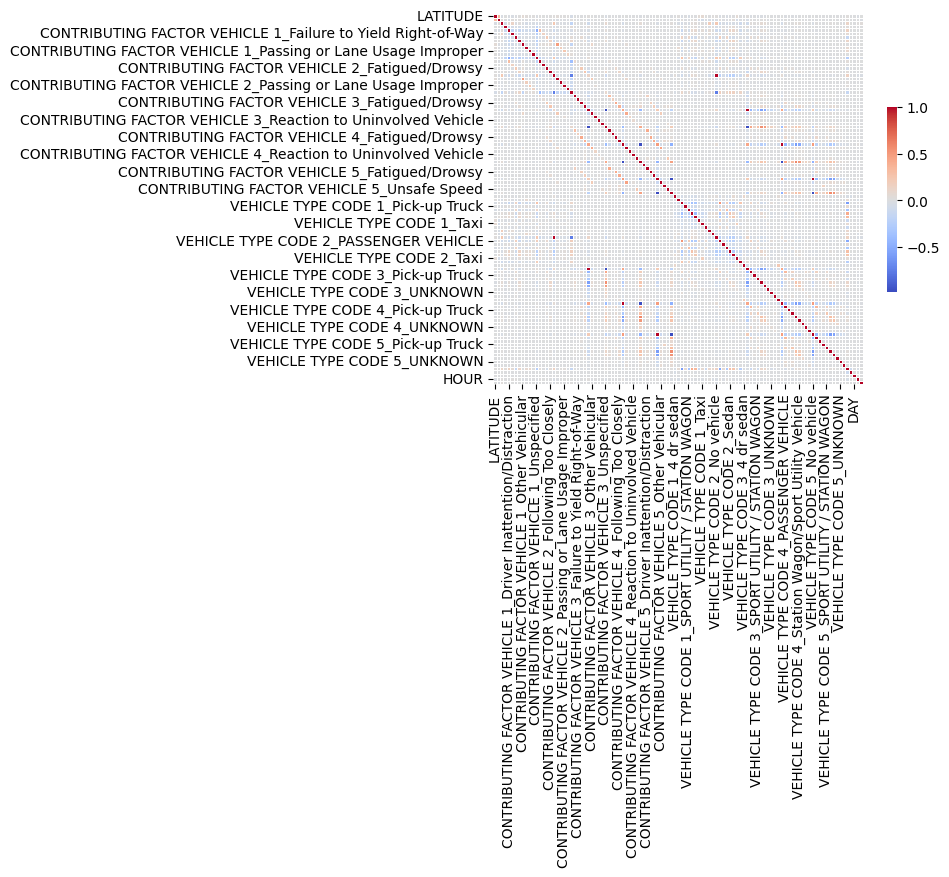

In [18]:
correlation_matrix = encoded_df.corr()
sns.heatmap(correlation_matrix,annot=False, fmt=".2f", cmap='coolwarm',
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [18]:
X = encoded_df.drop('CLASS TYPE', axis=1)
y = df['CLASS TYPE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [21]:
y_pred = dtc.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7266554443834995


In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
y_pred = lr.predict(X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8150309243252445


In [30]:
print(classification_report(y_test, y_pred))

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

     Class 0       0.82      0.97      0.89    165012
     Class 1       0.71      0.27      0.39     46095
     Class 2       0.00      0.00      0.00       198
     Class 3       0.00      0.00      0.00       179

    accuracy                           0.82    211484
   macro avg       0.38      0.31      0.32    211484
weighted avg       0.80      0.82      0.78    211484



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
